In [1]:
%matplotlib inline
import json
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
from matplotlib.ticker import MultipleLocator

In [2]:
regions = ["US-TEX", "US-CAL", "AU-SA", "NL", "GB" ]
REGIONS = ["Texas (US)", "California (US)", "South Australia", "Netherland", "Great Britain"]
torelance = 0.1

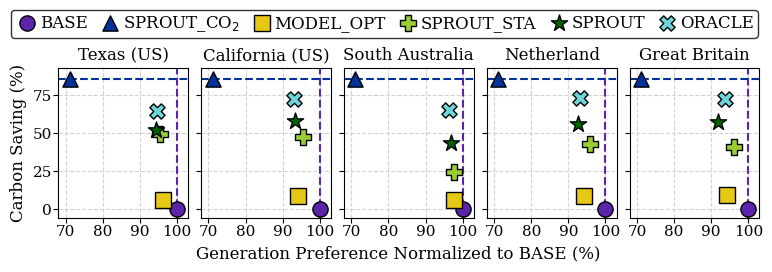

In [7]:
keys = ["carbon_per_req", "quality_preference"]
optimizers = ["baseline", "co2opt", "clover", "static", "lp", "oracle"]
OPTIMIZERS = ["BASE", "SPROUT_CO$_2$", "MODEL_OPT", "SPROUT_STA", "SPROUT", "ORACLE"]
fig, axs = plt.subplots(nrows=1, ncols=5, gridspec_kw={'hspace': 0.4, 'wspace': 0.1, 'bottom': 0.2, 
                    'top': 0.8, 'right':0.995, 'left':0.17}, figsize=(5*2-1.5,2.5), sharey=True)
colors = ["#5B24AA", "#01329B", "#E6C716",  "#9ACD32", "#006400","#6DD6DA"] 
markers = ['o', '^', 's', 'P', '*', "X"]
YLABEL = "Carbon Saving (%)"
XLABEL = "Generation Preference Normalized to BASE (%)"

for i, region in enumerate(regions):
    read_val = []
    for j, optimizer in enumerate(optimizers):
        file = f"../system/results/{region}/torelance_{torelance}/{optimizer}_opt_pai_gen.json"
        with open(file) as f:
            data = json.load(f)
        if j == 0:
            base_y = np.mean(data["carbon_per_req"])
        # get x and y
        y = (base_y - np.mean(data["carbon_per_req"])) / base_y * 100
        quality_key = "true_quality" if optimizer == "oracle" else "quality_preference"
        x = np.mean(np.array(data[quality_key] / np.array(data["pref_max"]))) * 100
        size = 150 if optimizer == "lp" else 120
        axs[i].scatter(x=x, y=y, color=colors[j], label=OPTIMIZERS[j], s=size, zorder=3, alpha=1, edgecolors="black",
                        marker=markers[j])
        if optimizer == "co2opt":
            axs[i].axhline(y, color=colors[j], linestyle='dashed', linewidth=1.5, zorder=2)
        elif optimizer == "baseline":
            axs[i].axvline(x, color=colors[j], linestyle='dashed', linewidth=1.5, zorder=2)
    axs[i].set_title(REGIONS[i], fontsize=12)
    axs[i].grid(which='both', axis='both', color='lightgrey', ls='dashed', zorder=0)
    axs[i].set_ylim(-6, 93)
    # axs[i].yaxis.set_major_locator(MultipleLocator(20))
    axs[i].xaxis.set_major_locator(MultipleLocator(10))
    axs[i].set_xlim(68, 103)
    axs[i].tick_params(axis='both', which='major', pad=1, labelsize=11)

axs[0].set_ylabel(YLABEL, fontsize=12)
axs[0].legend(loc='upper left', ncol=len(optimizers), mode="expand", borderpad=0.25,
              borderaxespad=0.1, edgecolor='black', handletextpad=0.01, labelspacing=1.5,
              handlelength=1.5, fontsize=12, columnspacing=3, bbox_to_anchor=(-.38,0.9,5.78,0.5))
fig.text(0.57, 0.04, XLABEL, ha='center', fontsize=12)
plt.savefig(f"figures/fig1_compare.pdf", bbox_inches='tight')